In [88]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from gower import gower_matrix
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

In [113]:
# Load the Titanic dataset
titanic_data = pd.read_csv('titanic_data.csv')

# Split the dataset into features and target
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

In [114]:
# Reagange the features
X = X[['Age', 'SibSp', 'Parch', 'Fare', 'Pclass', 'Sex', 'Embarked']]

In [115]:
# Scale the numerical features
scaler = MinMaxScaler()
X[['Age', 'SibSp', 'Parch', 'Fare']] = scaler.fit_transform(X[['Age', 'SibSp', 'Parch', 'Fare']])
X.head()

,Age,SibSp,Parch,Fare,Pclass,Sex,Embarked
0,0.447097,0.125,0.000000,0.030352,3,male,S
1,0.635587,0.000,0.000000,0.024447,2,male,S
2,0.484795,0.000,0.000000,0.047138,3,male,S
3,0.258608,0.000,0.000000,0.031425,3,male,S
4,0.283740,0.000,0.166667,0.123667,1,male,C


In [103]:
# Compute purity
def compute_purity(labels, true_labels):
    contingency_matrix = confusion_matrix(true_labels, labels)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

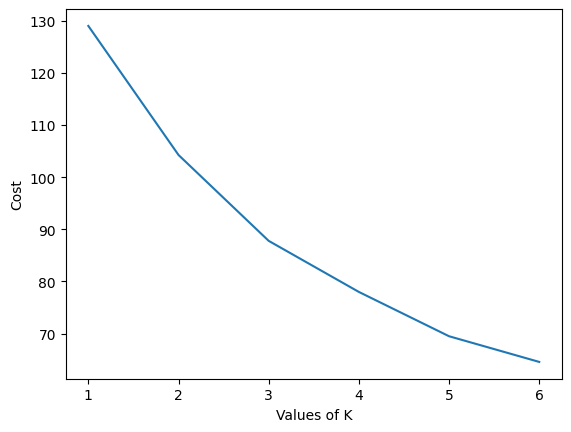

In [104]:
# Elbow method for kPrototypes
# X = X.drop('Pclass', axis=1)
cost = []
for num_clusters in list(range(1,7)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(X, categorical=[4,5,6])
    cost.append(kproto.cost_)
 
plt.plot(range(1,7) , cost)
plt.xlabel("Values of K")
plt.ylabel("Cost") 
plt.show()

In [117]:
# Perform clustering with 2 clusters
kproto = KPrototypes(n_clusters=2, init='Cao')
clusters = kproto.fit_predict(X, categorical=[4,5,6])

# Compute purity
purity = compute_purity(clusters, y)
print('Purity n=2:', purity)

# Perform clustering with 3 clusters
kproto = KPrototypes(n_clusters=3, init='Cao')
clusters = kproto.fit_predict(X, categorical=[4,5,6])

# Compute purity
purity = compute_purity(clusters, y)
print('Purity n=3:', purity)


Purity n=2: 0.755331088664422
Purity n=3: 0.654320987654321


In [ ]:
# Intra-cluster distance
def compute_intra_cluster_distance(data, labels, modes):
    intra_distances = []
    for cluster_id in np.unique(labels):
        cluster_data = data[labels == cluster_id]
        cluster_mode = modes[cluster_id].reshape(1, -1)
        distances = gower_matrix(cluster_data, cluster_mode)
        intra_distances.append(np.mean(distances))
    return np.mean(intra_distances)

# Inter-cluster distance
def compute_inter_cluster_distance(modes):
    distances = gower_matrix(modes, modes)
    triu_indices = np.triu_indices_from(distances, k=1)
    return np.mean(distances[triu_indices])

In [116]:
# Perform clustering with kPrototypes
kproto = KPrototypes(n_clusters=3, init='Cao', random_state=42)
clusters = kproto.fit_predict(X, categorical=[4, 5, 6])  # Indices of categorical columns

# Compute intra-cluster distance
# Ensure `kproto.modes_` aligns with the original feature types
modes = np.array(kproto.modes_, dtype=object)  # Modes as NumPy array
intra_cluster_distance = compute_intra_cluster_distance(X, clusters, modes)
print('Intra-cluster distance:', intra_cluster_distance)

# Compute inter-cluster distance
inter_cluster_distance = compute_inter_cluster_distance(modes)
print('Inter-cluster distance:', inter_cluster_distance)

AttributeError: 'KPrototypes' object has no attribute 'modes_'

In [118]:
# Drop the categorical features
X = X.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

In [ ]:
# Use elbow method on kMeans
SSE = []
for num_clusters in list(range(1,7)):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)

plt.plot(range(1,7) , SSE)
plt.xlabel("Values of K")
plt.ylabel("SSE")
plt.show()


In [119]:
# Fit the kMeans model with 2 clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Purity
purity = compute_purity(y_kmeans, y)  # labels: predicted, true_labels: ground truth
print(f"Purity n=2: {purity}")

# Fit the kMeans model with 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Purity
purity = compute_purity(y_kmeans, y)  # labels: predicted, true_labels: ground truth
print(f"Purity n=3: {purity}")


Purity n=2: 0.6161616161616161
Purity n=3: 0.6161616161616161
